In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score


### 1 Data Preprocessing
Steps:

Cleaning: Check for missing values, duplicates, and inconsistent date or location formats.
Transformation: Normalize numerical data.
Feature Engineering: Calculate features like daily growth rate, mortality ratio, and cases per population.

In [13]:
# Load data
covid_df = pd.read_csv("covid_19_clean_complete.csv")

# Check for missing values
covid_df.isnull().sum()

# Standardize date format
covid_df['Date'] = pd.to_datetime(covid_df['Date'])

# Create daily growth rate, mortality rate
covid_df['Daily_Growth_Rate'] = covid_df.groupby(['Country/Region'])['Confirmed'].pct_change().fillna(0)
covid_df['Mortality_Rate'] = covid_df['Deaths'] / covid_df['Confirmed']


In [14]:
covid_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Province/State     14664 non-null  object        
 1   Country/Region     49068 non-null  object        
 2   Lat                49068 non-null  float64       
 3   Long               49068 non-null  float64       
 4   Date               49068 non-null  datetime64[ns]
 5   Confirmed          49068 non-null  int64         
 6   Deaths             49068 non-null  int64         
 7   Recovered          49068 non-null  int64         
 8   Active             49068 non-null  int64         
 9   WHO Region         49068 non-null  object        
 10  Daily_Growth_Rate  49068 non-null  float64       
 11  Mortality_Rate     39009 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 4.5+ MB


In [15]:
covid_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Daily_Growth_Rate,Mortality_Rate
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,0.0,NaN
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,0.0,NaN
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,0.0,NaN
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,0.0,NaN
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,0.0,NaN


### 2. Exploratory Data Analysis (EDA)
Objective: Identify trends, correlations, and demographic/environmental factors.

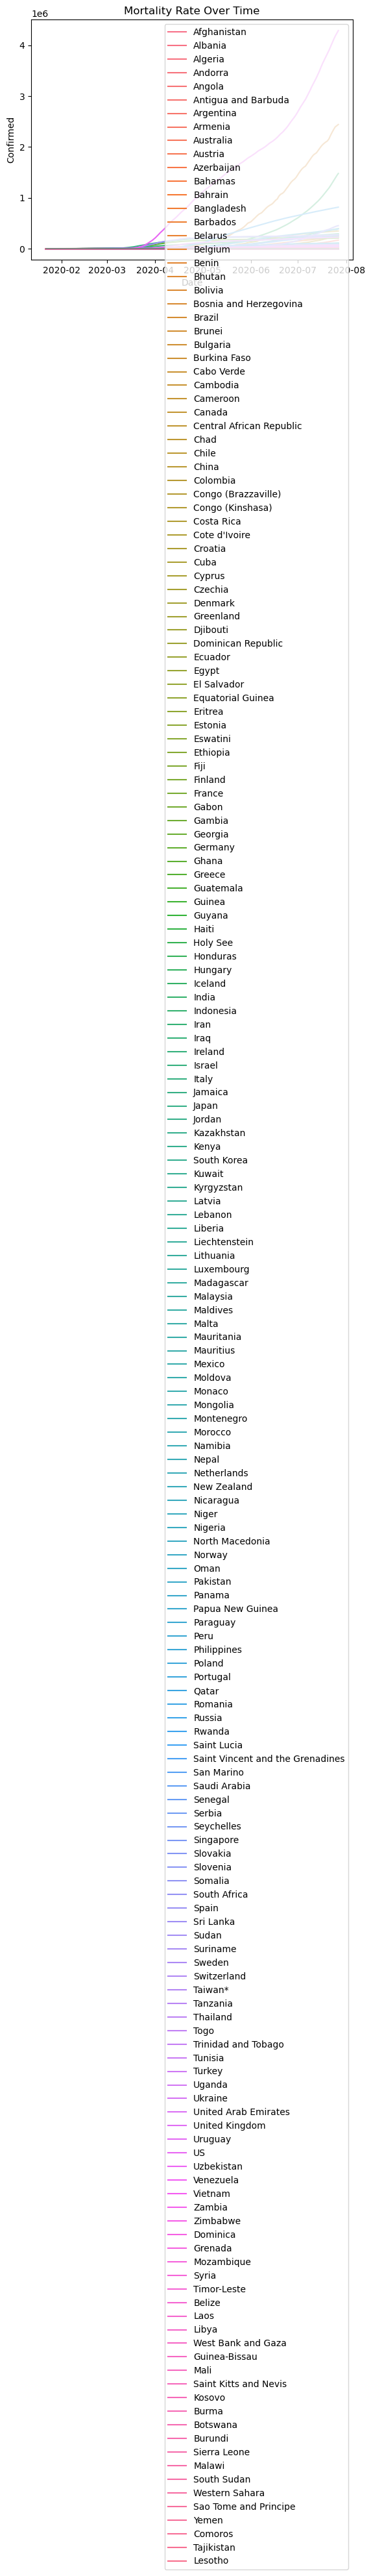

In [20]:

# Plot cumulative confirmed cases over time
sns.lineplot(x='Date', y='Confirmed', data=covid_df, hue='Country/Region')

# Plot mortality rate
sns.lineplot(x='Date', y='Mortality_Rate', data=covid_df)
plt.title('Mortality Rate Over Time')
plt.show()


### 3 Model Development
Models to Consider:

Time-Series Models: Use for predicting future case counts.
Classification Models: For predicting severity levels based on features.

In [17]:


# Check and replace any NaN or infinite values in the features
X = covid_df[features].replace([np.inf, -np.inf], np.nan).fillna(0)

# Define the target variable
y = (covid_df['Mortality_Rate'] > 0.05).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("F1 Score:", f1_score(y_test, predictions))


Accuracy: 0.9325453433869981
F1 Score: 0.719253604749788


### 4 Data Visualization and Reporting
Visualization: Generate charts to display model predictions and key EDA findings.

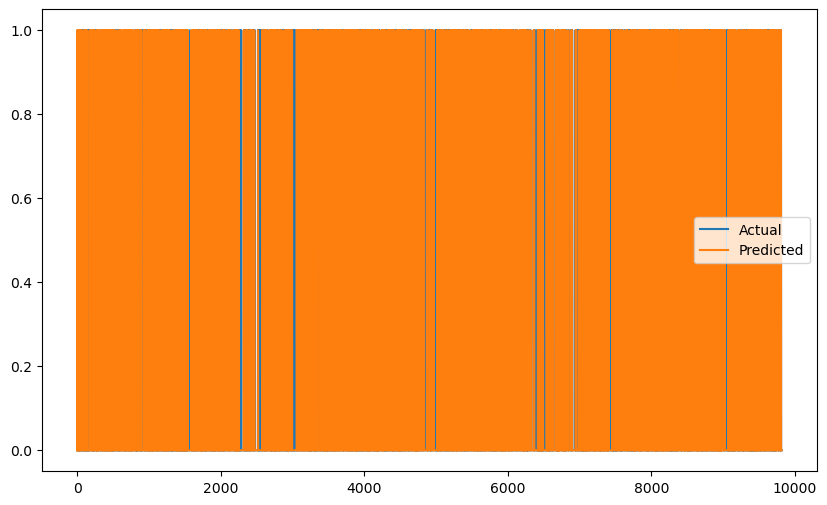

In [18]:

# Plot predicted vs actual mortality
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label="Actual")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.show()
